In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
n = 45
nodes = range(n)
edges = [
    (0,45), (0,42), (42,45),
    (0, 1), (0, 2), (0,5), (0,21), (0,22), (0,29),(0,1),
    (2, 44), (2, 3), (2,4), (5, 6), (5,8), (5,14),(29,30),(29,31),(29,32),(29,33),(29,34),(29,35),(29,36),
    (6,7), (8,9),(8,10),(8,11),(8,12),(8,13),(14,15),(14,16),(14,17),(14,18),(14,19),(14,20),
    (45,23),(45,25),(45,24),(45,26),(45,27),(27,28),(45,46)
]

attributes = {
    0:{'name':'Frontend', 'category':'1', 'size': 2},
        1:{'name':'Webpack', 'category':'1', 'size':150},
        2:{'name':'CSS', 'category':'1', 'size':150},
            44:{'name':'SASS', 'category':'1', 'size':150},
            3:{'name':'Tailwind', 'category':'1', 'size':150},
            4:{'name':'CSS Animations', 'category':'1', 'size':150},
        29:{'name':'Firebase', 'category':'1', 'size':150},
            30:{'name':'Firebase File Storage', 'category':'1', 'size':150},
            31:{'name':'Firebase Security Rules', 'category':'1', 'size':150},
            32:{'name':'Firestore Cloud functions', 'category':'1', 'size':150},
            33:{'name':'File Storage', 'category':'1', 'size':150},
            34:{'name':'File Storage', 'category':'1', 'size':150},
            35:{'name':'File Storage', 'category':'1', 'size':150},
            36:{'name':'File Storage', 'category':'1', 'size':150},
        5:{'name':'React', 'category':'1', 'size':150},
            6:{'name':'Frameworks', 'category':'1', 'size':150},
                7:{'name':'Next.js', 'category':'1', 'size':150},
            8:{'name':'Hooks', 'category':'1', 'size':150},
                9:{'name':'UseCallback', 'category':'1', 'size':200},
                10:{'name':'UseState', 'category':'1', 'size':150},
                11:{'name':'UseEffect', 'category':'1', 'size':150},
                12:{'name':'UseRef', 'category':'1', 'size':150},
                13:{'name':'CustomHooks', 'category':'1', 'size':150},
            14:{'name':'Advanced Concepts', 'category':'1', 'size':150},
                15:{'name':'React query', 'category':'1', 'size':150},
                16:{'name':'Mutations', 'category':'1', 'size':150},
                17:{'name':'Suspense', 'category':'1', 'size':150},
                18:{'name':'TRPC', 'category':'1', 'size':150},
                19:{'name':'State Machines', 'category':'1', 'size':150},
                20:{'name':'Prisma', 'category':'1', 'size':150},
        21:{'name':'Typescript', 'category':'1', 'size':150},
        22:{'name':'Hooks', 'category':'1', 'size':150},
    45:{'name':'General', 'category':'1', 'size':150},
        46:{'name':'Algorithms', 'category':'1', 'size':150},
        23:{'name':'Middleware', 'category':'1', 'size':150},
        24:{'name':'Github', 'category':'1', 'size':150},
        25:{'name':'Debugger', 'category':'1', 'size':150},
        26:{'name':'Testing', 'category':'1', 'size':150},
        27:{'name':'Search', 'category':'1', 'size':150},
            28:{'name':'Algolia Search', 'category':'1', 'size':150},

    37:{'name':'Deployment', 'category':'1', 'size':150},
        38:{'name':'Advanced', 'category':'1', 'size':150},
            39:{'name':'Docker', 'category':'1', 'size':150},
            40:{'name':'Kubernetes', 'category':'1', 'size':150},
            41:{'name':'Jenkins', 'category':'1', 'size':150},
    42:{'name':'Backend', 'category':'1', 'size':20},
        43:{'name':'Python', 'category':'1', 'size':20},

 }

In [4]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_node_attributes(G, attributes)

In [5]:
def get_node_size(node, G):
    neighb = list(G.neighbors(node))
    if len(neighb)==0:
        return attributes[node]['size']
    else:
        return sum([attributes[n]['size'] for n in neighb])
    
def update_sizes(attributes):
    l = [x[0] for x in sorted(G.out_degree, key=lambda x: x[1], reverse=True)]
    for node in l:
        attributes[node]['size'] = get_node_size(node, G)
    return attributes

In [6]:
attributes = update_sizes(attributes)
attributes = update_sizes(attributes)
nx.set_node_attributes(G, attributes)

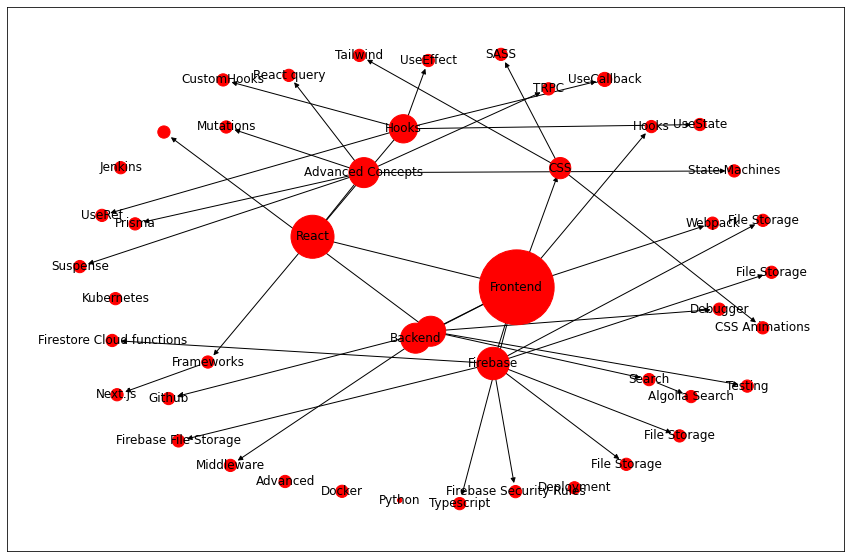

In [7]:
pos = nx.spring_layout(G, seed=0)

color_palette = {'1':'red', '2':'blue'}
color = [color_palette[node[1]['category']] for node in G.nodes(data=True)]
size = [node[1]['size'] for node in G.nodes(data=True)]
name = {i:attributes[i]['name'] for i in range(n)}

fig = plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=pos, node_color=color, node_size=size)
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos, labels=name)
plt.show()